In [9]:
pip install pandas numpy seaborn matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 8.9 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 7.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 8.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 8.1 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 7.2 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.8 MB/s eta 0:00:01
   ------------------ -----------

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries installed and working!")


Libraries installed and working!


In [5]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [9]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')


In [11]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']


In [12]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [14]:
df.isnull().sum()


area_type            0
availability         0
location             1
size                16
society           5502
total_sqft         247
bath                73
balcony            609
price                0
price_per_sqft     247
dtype: int64

In [15]:

df.describe()

,total_sqft,bath,balcony,price,price_per_sqft
count,13073.000000,13247.000000,12711.000000,13320.000000,1.307300e+04
mean,1554.942029,2.692610,1.584376,112.565627,7.949600e+03
std,1238.458773,1.341458,0.817263,148.971674,1.072440e+05
min,1.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,4.265734e+03
50%,1275.000000,2.000000,2.000000,72.000000,5.454545e+03
75%,1670.000000,3.000000,2.000000,120.000000,7.338057e+03
max,52272.000000,40.000000,3.000000,3600.000000,1.200000e+07


In [16]:
df.shape

(13320, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13320 non-null  object 
 1   availability    13320 non-null  object 
 2   location        13319 non-null  object 
 3   size            13304 non-null  object 
 4   society         7818 non-null   object 
 5   total_sqft      13073 non-null  float64
 6   bath            13247 non-null  float64
 7   balcony         12711 non-null  float64
 8   price           13320 non-null  float64
 9   price_per_sqft  13073 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


In [18]:

df.rename(columns={'size': 'size_bhk'}, inplace=True)


df['size_bhk'] = df['size_bhk'].apply(lambda x: str(x).split(' ')[0])   
df['size_bhk'] = pd.to_numeric(df['size_bhk'], errors='coerce')        


In [19]:
df.head()

,area_type,availability,location,size_bhk,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13320 non-null  object 
 1   availability    13320 non-null  object 
 2   location        13319 non-null  object 
 3   size_bhk        13304 non-null  float64
 4   society         7818 non-null   object 
 5   total_sqft      13073 non-null  float64
 6   bath            13247 non-null  float64
 7   balcony         12711 non-null  float64
 8   price           13320 non-null  float64
 9   price_per_sqft  13073 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


In [21]:
df.isnull().sum()

area_type            0
availability         0
location             1
size_bhk            16
society           5502
total_sqft         247
bath                73
balcony            609
price                0
price_per_sqft     247
dtype: int64

In [22]:

mode_bhk = df['size_bhk'].mode()[0]


df['size_bhk'] = df['size_bhk'].fillna(mode_bhk)



In [23]:
df.isnull().sum()

area_type            0
availability         0
location             1
size_bhk             0
society           5502
total_sqft         247
bath                73
balcony            609
price                0
price_per_sqft     247
dtype: int64

In [24]:

mode_bath = df['bath'].mode()[0]


df['bath'] = df['bath'].fillna(mode_bath)

In [25]:
df.isnull().sum()

area_type            0
availability         0
location             1
size_bhk             0
society           5502
total_sqft         247
bath                 0
balcony            609
price                0
price_per_sqft     247
dtype: int64

In [26]:
mode_balcony = df['balcony'].mode()[0]


df['balcony'] = df['balcony'].fillna(mode_bath)

In [27]:

df[df['size_bhk'] == df['size_bhk'].max()]


,area_type,availability,location,size_bhk,society,total_sqft,bath,balcony,price,price_per_sqft
4684,Plot Area,Ready To Move,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0,27500.0


In [28]:
df.sort_values(by='size_bhk', ascending=False)


,area_type,availability,location,size_bhk,society,total_sqft,bath,balcony,price,price_per_sqft
4684,Plot Area,Ready To Move,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.00,27500.000000
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.00,2875.000000
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19.0,NaN,2000.0,16.0,2.0,490.00,24500.000000
11559,Plot Area,18-Apr,1Kasavanhalli,18.0,HMwerCo,1200.0,18.0,2.0,200.00,16666.666667
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,2.0,550.00,5500.000000
...,...,...,...,...,...,...,...,...,...,...
13291,Plot Area,18-Jan,Weavers Colony,1.0,NaN,812.0,1.0,0.0,26.00,3201.970443
24,Super built-up Area,18-Nov,Thanisandra,1.0,Bhe 2ko,510.0,1.0,0.0,25.25,4950.980392
7097,Super built-up Area,Ready To Move,Laggere,1.0,NaN,1500.0,1.0,0.0,60.00,4000.000000
7122,Plot Area,Ready To Move,Subramanya Nagar,1.0,NaN,840.0,1.0,1.0,150.00,17857.142857


In [29]:
def convert_sqft_to_num(x):
    try:
        if '-' in str(x):
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

In [30]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13320 non-null  object 
 1   availability    13320 non-null  object 
 2   location        13319 non-null  object 
 3   size_bhk        13320 non-null  float64
 4   society         7818 non-null   object 
 5   total_sqft      13073 non-null  float64
 6   bath            13320 non-null  float64
 7   balcony         13320 non-null  float64
 8   price           13320 non-null  float64
 9   price_per_sqft  13073 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


In [32]:
before = df.shape[0]
df = df[df['total_sqft'] / df['size_bhk'] >= 300]
after = df.shape[0]

print("Removed rows:", before - after)


Removed rows: 991


In [33]:
df['society'].nunique()


2626

In [34]:
df.drop('society', axis=1, inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12329 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12329 non-null  object 
 1   availability    12329 non-null  object 
 2   location        12328 non-null  object 
 3   size_bhk        12329 non-null  float64
 4   total_sqft      12329 non-null  float64
 5   bath            12329 non-null  float64
 6   balcony         12329 non-null  float64
 7   price           12329 non-null  float64
 8   price_per_sqft  12329 non-null  float64
dtypes: float64(6), object(3)
memory usage: 963.2+ KB


In [36]:
df.isnull().sum()

area_type         0
availability      0
location          1
size_bhk          0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [37]:
df.dropna(subset=['location'], inplace=True)


In [38]:
df.describe()
df.info()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
Index: 12328 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12328 non-null  object 
 1   availability    12328 non-null  object 
 2   location        12328 non-null  object 
 3   size_bhk        12328 non-null  float64
 4   total_sqft      12328 non-null  float64
 5   bath            12328 non-null  float64
 6   balcony         12328 non-null  float64
 7   price           12328 non-null  float64
 8   price_per_sqft  12328 non-null  float64
dtypes: float64(6), object(3)
memory usage: 963.1+ KB


area_type            4
availability        81
location          1215
size_bhk            13
total_sqft        1855
bath                14
balcony              4
price             1835
price_per_sqft    7226
dtype: int64

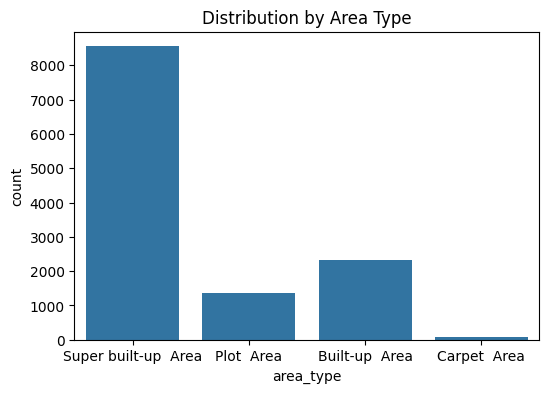

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='area_type', data=df)
plt.title("Distribution by Area Type")
plt.show()


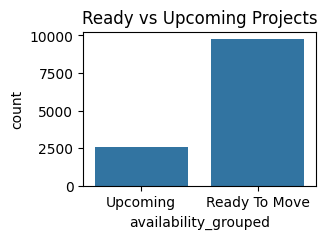

In [45]:
plt.figure(figsize=(3,2))
df['availability_grouped'] = df['availability'].apply(lambda x: 'Ready To Move' if x == 'Ready To Move' else 'Upcoming')
sns.countplot(x='availability_grouped', data=df)
plt.title("Ready vs Upcoming Projects")
plt.show()


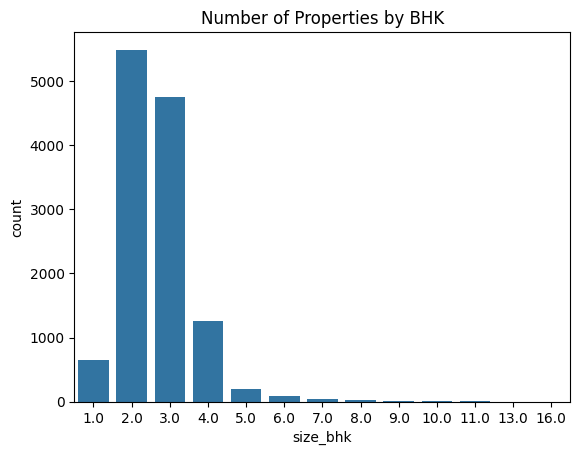

In [54]:


sns.countplot(x='size_bhk', data=df)
plt.title('Number of Properties by BHK')
plt.show()


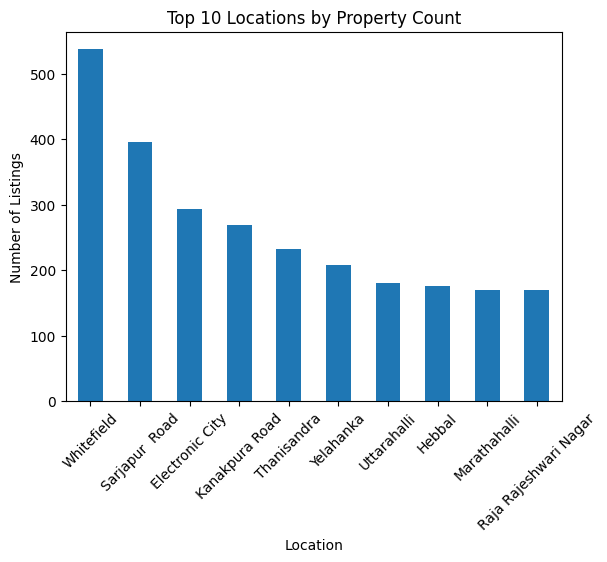

In [55]:
top_locations = df['location'].value_counts().head(10)
top_locations.plot(kind='bar', title='Top 10 Locations by Property Count')
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


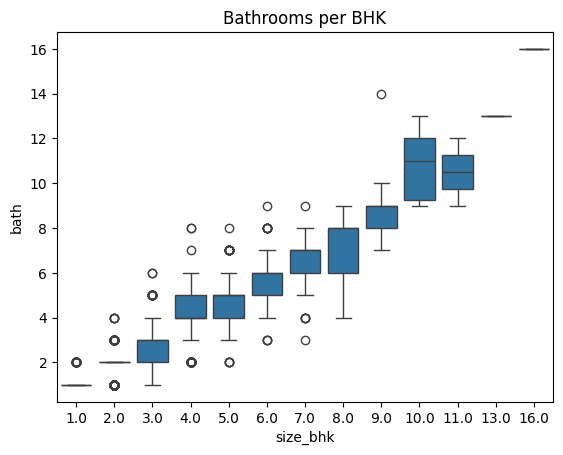

In [56]:
sns.boxplot(x='size_bhk', y='bath', data=df)
plt.title("Bathrooms per BHK")
plt.show()


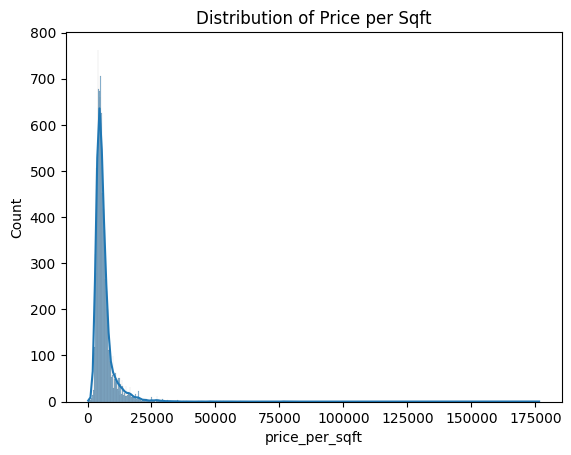

In [57]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Distribution of Price per Sqft")
plt.show()


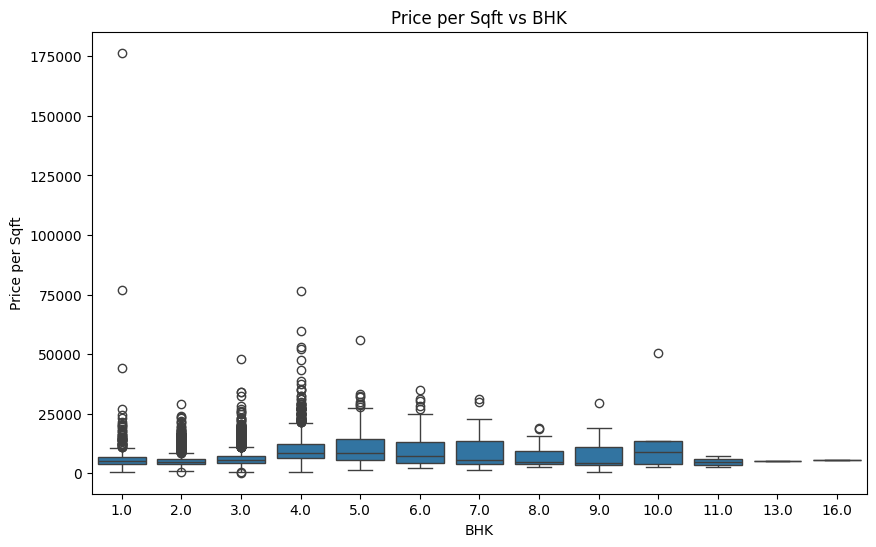

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='size_bhk', y='price_per_sqft')
plt.title('Price per Sqft vs BHK')
plt.xlabel('BHK')
plt.ylabel('Price per Sqft')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9396\390785364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_price.values, y=location_price.index, palette='coolwarm',legend=False)


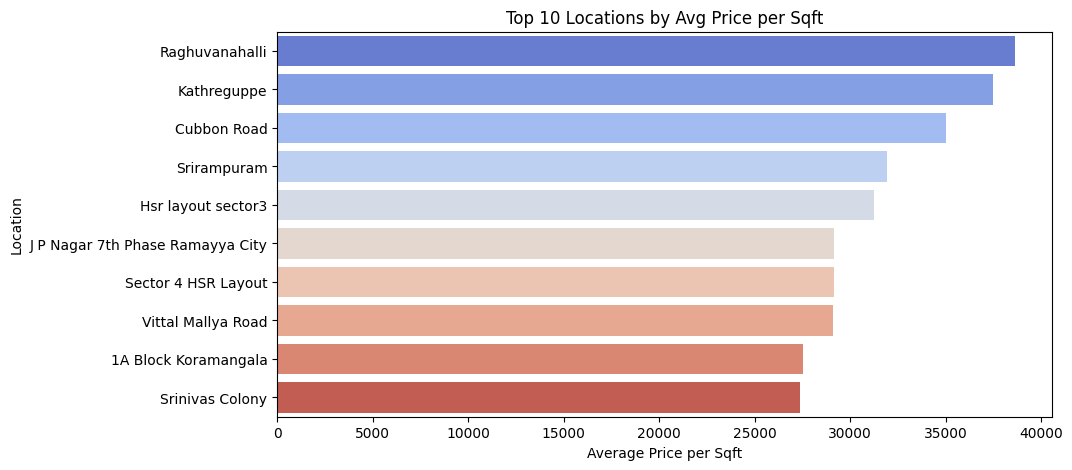

In [51]:
location_price = df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=location_price.values, y=location_price.index, palette='coolwarm',legend=False)
plt.title('Top 10 Locations by Avg Price per Sqft')
plt.xlabel('Average Price per Sqft')
plt.ylabel('Location')
plt.show()


In [47]:
df.to_csv("cleaned_bangalore_real_estate.csv", index=False)
